**This notebook will simulate several scenarios and model how a virus (COVID-19) could spread in such scenarios. 
I will then investigate how strategies that use preventative medicine (Chloroquine) help curb the pandemic.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')

In [2]:
def sim_uniform(N=100, a = 2.0, steps=100, mu=0.1, I=1, R=10, dist=0.02):
    #I is the number of infected at t = 0
    #R is the number of timesteps it takes to recover or die
    #dist is the "contact" range
    
    colors = np.zeros((steps + 1, N)) #Visually signify the states of the model
    r_time = np.zeros((steps + 1, N))
    walkers = np.zeros((steps + 1, N, 2)) #N walkers with 2-D coordinates describing their location
    i_num = 256
    r_num = 128
    #Initialize the infected
    for j in range(I):
        colors[0][j] = i_num
        colors[1][j] = i_num
        r_time[0][j] = R
            
    for t in range(steps):
        if t == 0:
            walkers[0] = np.random.uniform(-a, a, (N , 2))
            continue
        colors[t] = colors[t-1]
        for i in range(N):
            #Generate a random number between 0 & 2pi
            angle = np.random.rand() * 2 * np.pi
            newX = walkers[t - 1][i][0] + np.sin(angle)*mu 
            newY = walkers[t - 1][i][1] + np.cos(angle)*mu
            newX = max(min(newX, a), -a)
            newY = max(min(newY, a), -a)
            walkers[t][i][0] = newX
            walkers[t][i][1] = newY
        
        #state check.. update infected
        current_walkers = walkers[t]
        exposed = np.zeros(N)
        for i in range(N):
            if colors[t][i] == i_num: #If you are infected
                r_time[t][i] = r_time[t-1][i] - 1 #Increment Recovery
                distances = current_walkers - current_walkers[i] #Find those you exposed
                distances = np.sum(np.square(distances), axis=-1)
                distances = np.where(distances <= np.square(dist), 1, 0)
                exposed += distances #Add the exposed to the exposed list
                
        for i in range(N):
            if r_time[t][i] < 0.0: #If your recovery time has ended
                colors[t][i] = r_num
            else:
                if exposed[i] > 0.0:
                    if colors[t][i] == 0.0: #If the exposed individual is vulnerable
                        colors[t][i] = i_num
                        r_time[t][i] = R
                    
    return walkers, colors

In [3]:
def update_plot(t, offset, colors, scat):
    scat.set_offsets(offset[t])
    scat.set_array(colors[t])
    num_infected = sum(colors[t] == 256) # 256 is infected number
    num_recovered = sum(colors[t] == 128) # 128 is recovered number
    num_vulnerable = sum(colors[t] == 0) # 0 is the default number
    counts[0].set_text(f"infected: {num_infected}")
    counts[1].set_text(f"recovered: {num_recovered}")
    counts[2].set_text(f"vulnerable: {num_vulnerable}")
    return scat

def plot_infection(colors, steps):
    X = []
    Y = []
    for t in range(steps):
        X.append(t)
        infected = np.where(colors[t] == 256, 1, 0)
        infected = np.sum(infected) / len(infected)
        Y.append(infected)
        
    return X, Y

In [4]:
#Hyperparameters for simulations
a = 5.0 #Range
N = 100 #Number of Humans
steps = 100 #Number of time steps
R = 15 #Recovery Time
dist = 0.5 #Proximity for Exposure
mu = 0.4 #Average size of movement

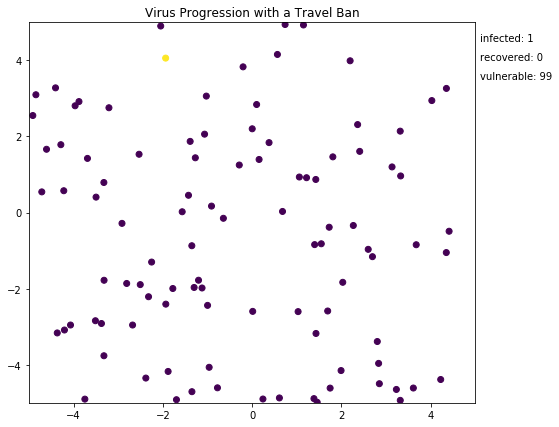

In [5]:
#Simulate and Animate Travel Ban
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim((-a, a))
ax.set_ylim((-a, a))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height]) # Shrink current axis by 20%
counts = [ax.text(1.01, 0.95-i*0.05,  '', transform=ax.transAxes) for i in range(3)] # 3 categories
walkers, colors = sim_uniform(N=N, a=a, steps=steps, R=R, dist=dist, mu=mu)
scat = plt.scatter(np.zeros(N), np.zeros(N), c=colors[0])
plt.title("Virus Progression with a Travel Ban")
anim = animation.FuncAnimation(fig, update_plot, frames=steps,
                              fargs=(walkers, colors, scat), interval=200)

In [6]:
#Display Animation
anim

Text(0.5,1,'Infection Rate with a Travel Ban')

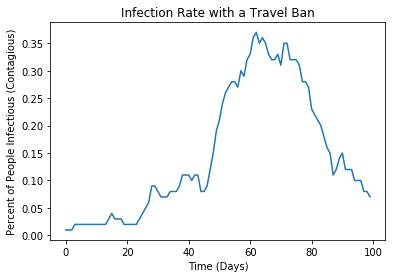

In [7]:
#Show Infection Plot
X, Y  = plot_infection(colors, steps)
plt.plot(X, Y)
plt.xlabel("Time (Days)")
plt.ylabel("Percent of People Infectious (Contagious)")
plt.title("Infection Rate with a Travel Ban")

In [8]:
#Levy Flight Simulation... Step size follows 1/x^2
def sim_levy(N=100, a = 2.0, steps=100, mu=0.1, I=1, R=10, dist=0.02):
    #I is the number of infected at t = 0
    #R is the number of timesteps it takes to recover or die
    #dist is the "contact" range
    
    colors = np.zeros((steps + 1, N)) #Visually signify the states of the model
    r_time = np.zeros((steps + 1, N))
    walkers = np.zeros((steps + 1, N, 2)) #N walkers with 2-D coordinates describing their location
    i_num = 256
    r_num = 128
    #Initialize the infected
    for j in range(I):
        colors[0][j] = i_num
        colors[1][j] = i_num
        r_time[0][j] = R
            
    for t in range(steps):
        if t == 0:
            walkers[0] = np.random.uniform(-a, a, (N , 2))
            continue
        colors[t] = colors[t-1]
        for i in range(N):
            #Generate a random number between 0 & 2pi
            angle = np.random.rand() * 2 * np.pi
            
            step = np.random.exponential(mu)
            newX = walkers[t - 1][i][0] + np.sin(angle)*step 
            newY = walkers[t - 1][i][1] + np.cos(angle)*step
            newX = max(min(newX, a), -a)
            newY = max(min(newY, a), -a)
            walkers[t][i][0] = newX
            walkers[t][i][1] = newY
        
        #state check.. update infected
        current_walkers = walkers[t]
        exposed = np.zeros(N)
        for i in range(N):
            if colors[t][i] == i_num: #If you are infected
                r_time[t][i] = r_time[t-1][i] - 1 #Increment Recovery
                distances = current_walkers - current_walkers[i] #Find those you exposed
                distances = np.sum(np.square(distances), axis=-1)
                distances = np.where(distances <= np.square(dist), 1, 0)
                exposed += distances #Add the exposed to the exposed list
                
        for i in range(N):
            if r_time[t][i] < 0.0: #If your recovery time has ended
                colors[t][i] = r_num
            else:
                if exposed[i] > 0.0:
                    if colors[t][i] == 0.0: #If the exposed individual is vulnerable
                        colors[t][i] = i_num
                        r_time[t][i] = R
                    
    return walkers, colors

In [ ]:
#Simulate a complacent world (no travel bans)
fig, ax = plt.subplots()
ax.set_xlim((-a, a))
ax.set_ylim((-a, a))
walkers, colors = sim_levy(N=N, a=a, steps=steps, R=R, dist=dist, mu=mu)
scat = plt.scatter(np.zeros(N), np.zeros(N), c=colors[0])
plt.title("Virus Progression with Free Travel (No Travel Ban)")
anim = animation.FuncAnimation(fig, update_plot, frames=steps,
                              fargs=(walkers, colors, scat), interval=steps)

In [ ]:
#Show Animation
anim

In [ ]:
#Plot the infection curve
X, Y  = plot_infection(colors, steps)
plt.plot(X, Y)
plt.xlabel("Time (Days)")
plt.ylabel("Percent of People Infectious (Contagious)")
plt.title("Infection Rate with Free Travel")

In [ ]:
#The following will simulate that the proportion P will have preventative medicine.]
#With an effectiveness of prevention of E per exposure
def sim_levy_prev(N=100, a = 2.0, steps=100, mu=0.1, I=1, R=10, P=0.5, E=0.5, dist=0.02):
    #I is the number of infected at t = 0
    #R is the number of timesteps it takes to recover or die
    #dist is the "contact" range
    
    colors = np.zeros((steps + 1, N)) #Visually signify the states of the model
    r_time = np.zeros((steps + 1, N))
    walkers = np.zeros((steps + 1, N, 2)) #N walkers with 2-D coordinates describing their location
    i_num = 256
    r_num = 128
    p_num = 64
    
    #Initialize the infected
    for j in range(I):
        colors[0][j] = i_num
        colors[1][j] = i_num
        r_time[0][j] = R
    
    for j in range(int(N*P)):
        colors[0][N-j-1] = p_num
        colors[1][N-j-1] = p_num
            
    for t in range(steps):
        if t == 0:
            walkers[0] = np.random.uniform(-a, a, (N , 2))
            continue
        colors[t] = colors[t-1]
        for i in range(N):
            #Generate a random number between 0 & 2pi
            angle = np.random.rand() * 2 * np.pi
            
            step = np.random.exponential(mu)
            newX = walkers[t - 1][i][0] + np.sin(angle)*step 
            newY = walkers[t - 1][i][1] + np.cos(angle)*step
            newX = max(min(newX, a), -a)
            newY = max(min(newY, a), -a)
            walkers[t][i][0] = newX
            walkers[t][i][1] = newY
        
        #state check.. update infected
        current_walkers = walkers[t]
        exposed = np.zeros(N)
        for i in range(N):
            if colors[t][i] == i_num: #If you are infected
                r_time[t][i] = r_time[t-1][i] - 1 #Increment Recovery
                distances = current_walkers - current_walkers[i] #Find those you exposed
                distances = np.sum(np.square(distances), axis=-1)
                distances = np.where(distances <= np.square(dist), 1, 0)
                exposed += distances #Add the exposed to the exposed list
                
        for i in range(N):
            if r_time[t][i] < 0.0: #If your recovery time has ended
                colors[t][i] = r_num
            else:
                if exposed[i] > 0.0:
                    if colors[t][i] == 0.0: #If the exposed individual is vulnerable
                        colors[t][i] = i_num
                        r_time[t][i] = R
                    if colors[t][i] == p_num: #If the exposed is taking medication
                        prob_infect = 1 - (E)**exposed[i]
                        if np.random.rand() <= prob_infect:
                            colors[t][i] = i_num
                            r_time[t][i] = R
    return walkers, colors

In [ ]:
#Simulate a complacent world (no travel bans) with preventative medicine
P = 0.40 #Proportion taking medicine
E = 0.95 #Effectiveness per exposure
fig, ax = plt.subplots()
ax.set_xlim((-a, a))
ax.set_ylim((-a, a))
walkers, colors = sim_levy_prev(N=N, a=a, steps=steps, R=R, dist=dist, mu=mu,
                               P=P, E=E)
scat = plt.scatter(np.zeros(N), np.zeros(N), c=colors[0])
plt.title("Virus Progression with Free Travel and Preventative Medicine")
anim = animation.FuncAnimation(fig, update_plot, frames=steps,
                              fargs=(walkers, colors, scat), interval=steps)

In [ ]:
#Show Animation
anim

In [ ]:
#Plot the infection curve
X, Y  = plot_infection(colors, steps)
plt.plot(X, Y)
plt.xlabel("Time (Days)")
plt.ylabel("Percent of People Infectious (Contagious)")
plt.title("Infection Rate with Free Travel and Preventative Medicine")

In [ ]:
#The following will simulate that the proportion P will have preventative medicine.]
#With an effectiveness of prevention of E per exposure
def sim_uniform_prev(N=100, a = 2.0, steps=100, mu=0.1, I=1, R=10, P=0.5, E=0.5, dist=0.02):
    #I is the number of infected at t = 0
    #R is the number of timesteps it takes to recover or die
    #dist is the "contact" range
    
    colors = np.zeros((steps + 1, N)) #Visually signify the states of the model
    r_time = np.zeros((steps + 1, N))
    walkers = np.zeros((steps + 1, N, 2)) #N walkers with 2-D coordinates describing their location
    i_num = 256
    r_num = 128
    p_num = 64
    
    #Initialize the infected
    for j in range(I):
        colors[0][j] = i_num
        colors[1][j] = i_num
        r_time[0][j] = R
    
    for j in range(int(N*P)):
        colors[0][N-j-1] = p_num
        colors[1][N-j-1] = p_num
            
    for t in range(steps):
        if t == 0:
            walkers[0] = np.random.uniform(-a, a, (N , 2))
            continue
        colors[t] = colors[t-1]
        for i in range(N):
            #Generate a random number between 0 & 2pi
            angle = np.random.rand() * 2 * np.pi
            
            newX = walkers[t - 1][i][0] + np.sin(angle)*mu 
            newY = walkers[t - 1][i][1] + np.cos(angle)*mu
            newX = max(min(newX, a), -a)
            newY = max(min(newY, a), -a)
            walkers[t][i][0] = newX
            walkers[t][i][1] = newY
        
        #state check.. update infected
        current_walkers = walkers[t]
        exposed = np.zeros(N)
        for i in range(N):
            if colors[t][i] == i_num: #If you are infected
                r_time[t][i] = r_time[t-1][i] - 1 #Increment Recovery
                distances = current_walkers - current_walkers[i] #Find those you exposed
                distances = np.sum(np.square(distances), axis=-1)
                distances = np.where(distances <= np.square(dist), 1, 0)
                exposed += distances #Add the exposed to the exposed list
                
        for i in range(N):
            if r_time[t][i] < 0.0: #If your recovery time has ended
                colors[t][i] = r_num
            else:
                if exposed[i] > 0.0:
                    if colors[t][i] == 0.0: #If the exposed individual is vulnerable
                        colors[t][i] = i_num
                        r_time[t][i] = R
                    if colors[t][i] == p_num: #If the exposed is taking medication
                        prob_infect = 1 - (E)**exposed[i]
                        if np.random.rand() < prob_infect:
                            colors[t][i] = i_num
                            r_time[t][i] = R
                    
    return walkers, colors

In [ ]:
#Travel Ban + Preventative Medicine
fig, ax = plt.subplots()
ax.set_xlim((-a, a))
ax.set_ylim((-a, a))
walkers, colors = sim_uniform_prev(N=N, a=a, steps=steps, R=R, dist=dist, mu=mu,
                               P=P, E=E)
scat = plt.scatter(np.zeros(N), np.zeros(N), c=colors[0])
plt.title("Virus Progression under a Travel Ban and Preventative Medicine")
anim = animation.FuncAnimation(fig, update_plot, frames=steps,
                              fargs=(walkers, colors, scat), interval=steps)

In [ ]:
#Show Animation
anim

In [ ]:
#Plot the infection curve
X, Y  = plot_infection(colors, steps)
plt.plot(X, Y)
plt.xlabel("Time (Days)")
plt.ylabel("Percent of People Infectious (Contagious)")
plt.title("Infection Rate with a Travel Ban and Preventative Medicine")

In [ ]:
#The following will simulate that the proportion P will have preventative medicine.]
#With an effectiveness of prevention of E per exposure
def sim(N=100, a = 2.0, steps=100, mu=0.1, I=1, R=10, P=0.5, E=0.5, dist=0.02, 
       behav="levy"):
    #I is the number of infected at t = 0
    #R is the number of timesteps it takes to recover or die
    #dist is the "contact" range
    
    colors = np.zeros((steps + 1, N)) #Visually signify the states of the model
    r_time = np.zeros((steps + 1, N))
    walkers = np.zeros((steps + 1, N, 2)) #N walkers with 2-D coordinates describing their location
    i_num = 256
    r_num = 128
    p_num = 64
    
    #Initialize the infected
    for j in range(I):
        colors[0][j] = i_num
        colors[1][j] = i_num
        r_time[0][j] = R
    
    for j in range(int(N*P)):
        colors[0][N-j-1] = p_num
        colors[1][N-j-1] = p_num
            
    for t in range(steps):
        if t == 0:
            walkers[0] = np.random.uniform(-a, a, (N , 2))
            continue
        colors[t] = colors[t-1]
        for i in range(N):
            #Generate a random number between 0 & 2pi
            angle = np.random.rand() * 2 * np.pi
            
            step = 0
            if behav is "levy":
                step = np.random.exponential(mu)
            elif behav is "uniform":
                step = np.random.rand()*2*mu
            elif behav is "normal":
                step = np.random.normal(mu, 0.01)
            else: #No varying stepsize
                step = mu
                
            newX = walkers[t - 1][i][0] + np.sin(angle)*step 
            newY = walkers[t - 1][i][1] + np.cos(angle)*step
            newX = max(min(newX, a), -a)
            newY = max(min(newY, a), -a)
            walkers[t][i][0] = newX
            walkers[t][i][1] = newY
        
        #state check.. update infected
        current_walkers = walkers[t]
        exposed = np.zeros(N)
        for i in range(N):
            if colors[t][i] == i_num: #If you are infected
                r_time[t][i] = r_time[t-1][i] - 1 #Increment Recovery
                distances = current_walkers - current_walkers[i] #Find those you exposed
                distances = np.sum(np.square(distances), axis=-1)
                distances = np.where(distances <= np.square(dist), 1, 0)
                exposed += distances #Add the exposed to the exposed list
                
        for i in range(N):
            if r_time[t][i] < 0.0: #If your recovery time has ended
                colors[t][i] = r_num
            else:
                if exposed[i] > 0.0:
                    if colors[t][i] == 0.0: #If the exposed individual is vulnerable
                        colors[t][i] = i_num
                        r_time[t][i] = R
                    if colors[t][i] == p_num: #If the exposed is taking medication
                        prob_infect = 1 - (E)**exposed[i]
                        if np.random.rand() <= prob_infect:
                            colors[t][i] = i_num
                            r_time[t][i] = R
    return walkers, colors

In [ ]:
#Travel Ban + Preventative Medicine
fig, ax = plt.subplots()
ax.set_xlim((-a, a))
ax.set_ylim((-a, a))
walkers, colors = sim(N=N, a=a, steps=steps, R=R, dist=dist, mu=mu,
                               P=P, E=E, behav="uniform")
scat = plt.scatter(np.zeros(N), np.zeros(N), c=colors[0])
plt.title("Virus Progression with a Travel Ban and Preventative Medicine")
anim = animation.FuncAnimation(fig, update_plot, frames=steps,
                              fargs=(walkers, colors, scat), interval=steps)

In [ ]:
anim

In [ ]:
#Plot the infection curve
X, Y  = plot_infection(colors, steps)
plt.plot(X, Y)
plt.xlabel("Time (Days)")
plt.ylabel("Percent of People Infectious (Contagious)")
plt.title("Infection Rate with Free Travel and Preventative Medicine")